<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [47]:
# Import your libraries:

%matplotlib inline
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import math

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data: Wholesale customers data
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [4]:
# The data set refers to clients of a wholesale distributor.
# It includes the annual spending in monetary units (m.u.) on diverse product categories.

In [5]:
X

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [43]:
X.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# What does each column mean?

    # Only categorical feature is channel :
# Channel : Categorical feature but converted to numerical, 1 is Hotel, restaurant and cafe and 2 is Retail store

    # The rest of the features are numerical :
# Fresh : Numerical feature, annual spending on fresh products
# MILK : annual spending on milk products
# GROCERY: annual spending on grocery products
# FROZEN: annual spending on frozen products
# DETERGENTS_PAPER: annual spending on detergents and paper products
# DELICATESSEN: annual spending on delicatessen products

    # Target column (categorical but transformed into numerical):
# REGION: customers Region : 1 is Lisbon, 2 is Oporto or 3 is Other

In [7]:
# Any categorical data to convert?
# NO
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [8]:
# Any missing data to remove?
# NO
X.isnull().sum()

Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
# Column collinearity - any high correlations?
def print_corr(df):
    '''
        Function that return a correlation matrix in a heatmap plot.
        
        Parameters : Pandas DataFrame
        
        Return: seaborn heatmap
    '''
    correlation = df.corr()

    mask = np.zeros_like(correlation, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(10, 10))

    cmap = sns.diverging_palette(180, 20, as_cmap=True)
    sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    return plt.show()

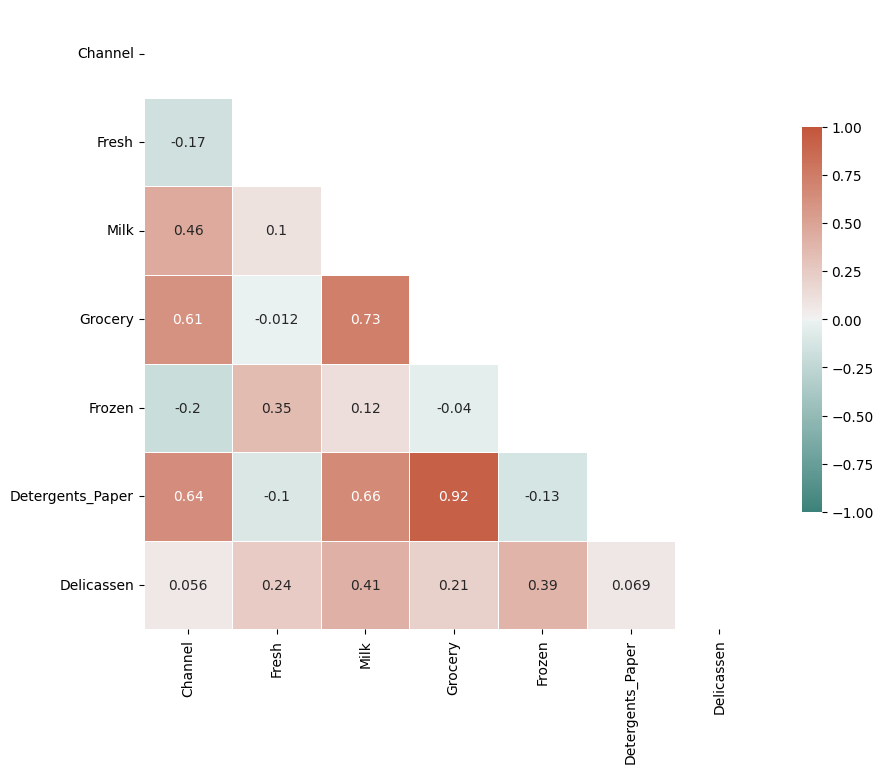

In [10]:
print_corr(X)

In [11]:
# There is a high correlation between Detergents_Paper and Grocery but since they are significantly different categories we will keep both

In [12]:
# Descriptive stats : Any outliers to remove?

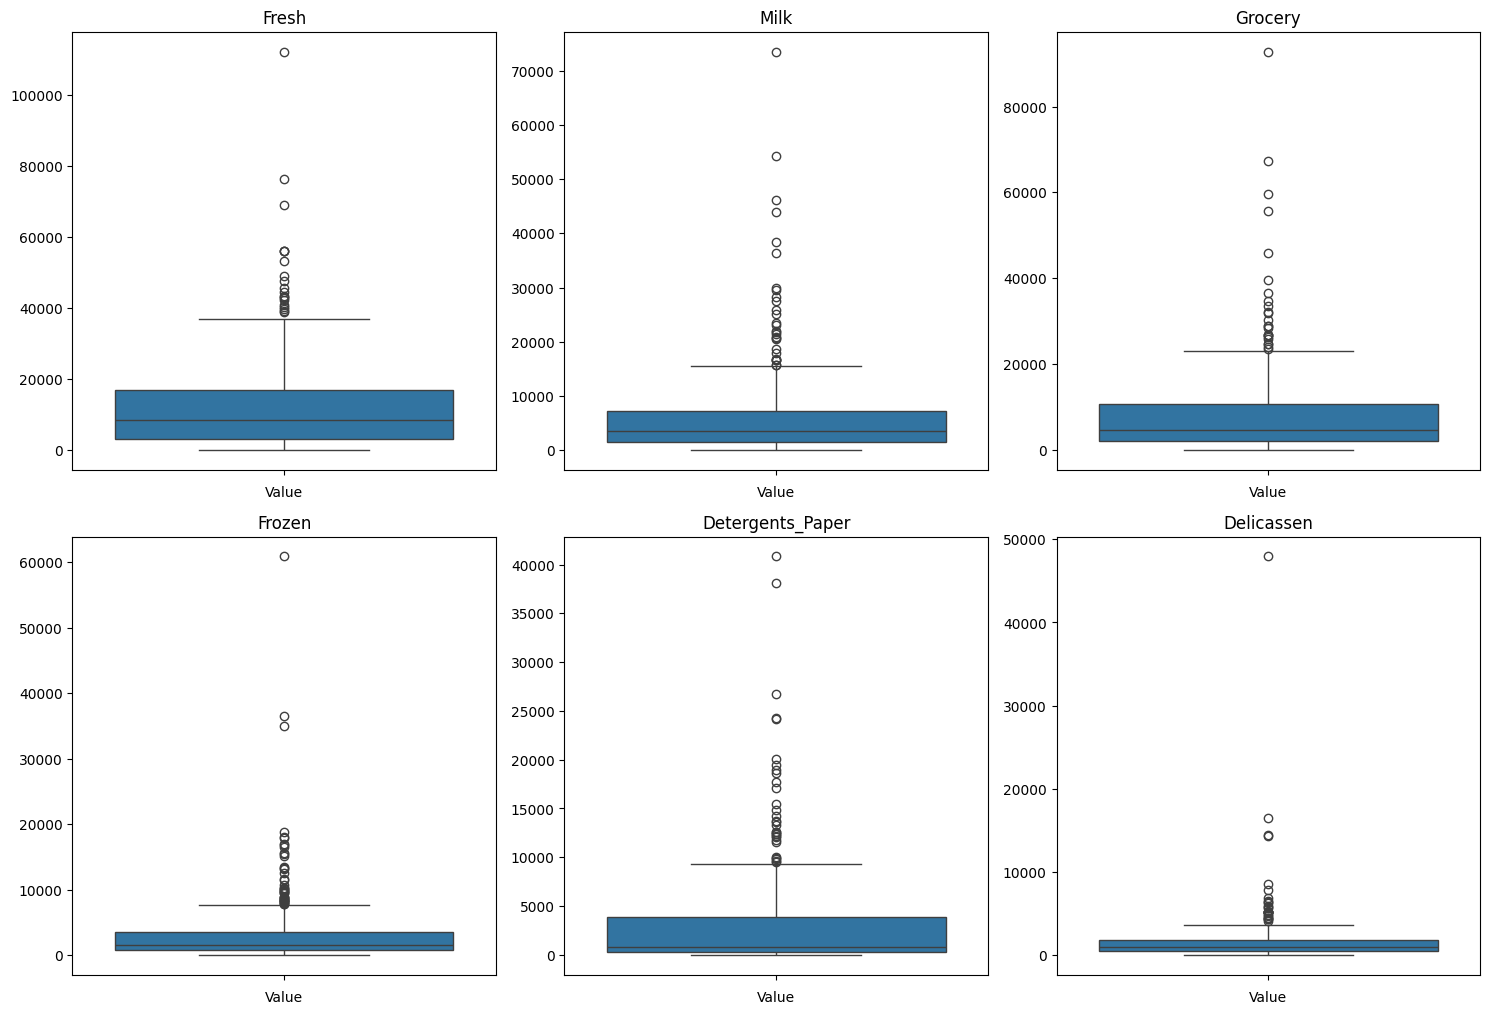

In [51]:
columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Calculate the number of rows and columns for the subplot grid
num_columns = len(columns)
grid_size = math.ceil(math.sqrt(num_columns))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(y=X[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, grid_size * grid_size):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
# Yes there are a lot of outliers in the data and in each column. 
# We choose to remove them since the store's insights need to be relevant to the average shopper.

In [ ]:
# Column-wise data distribution - is the distribution skewed?

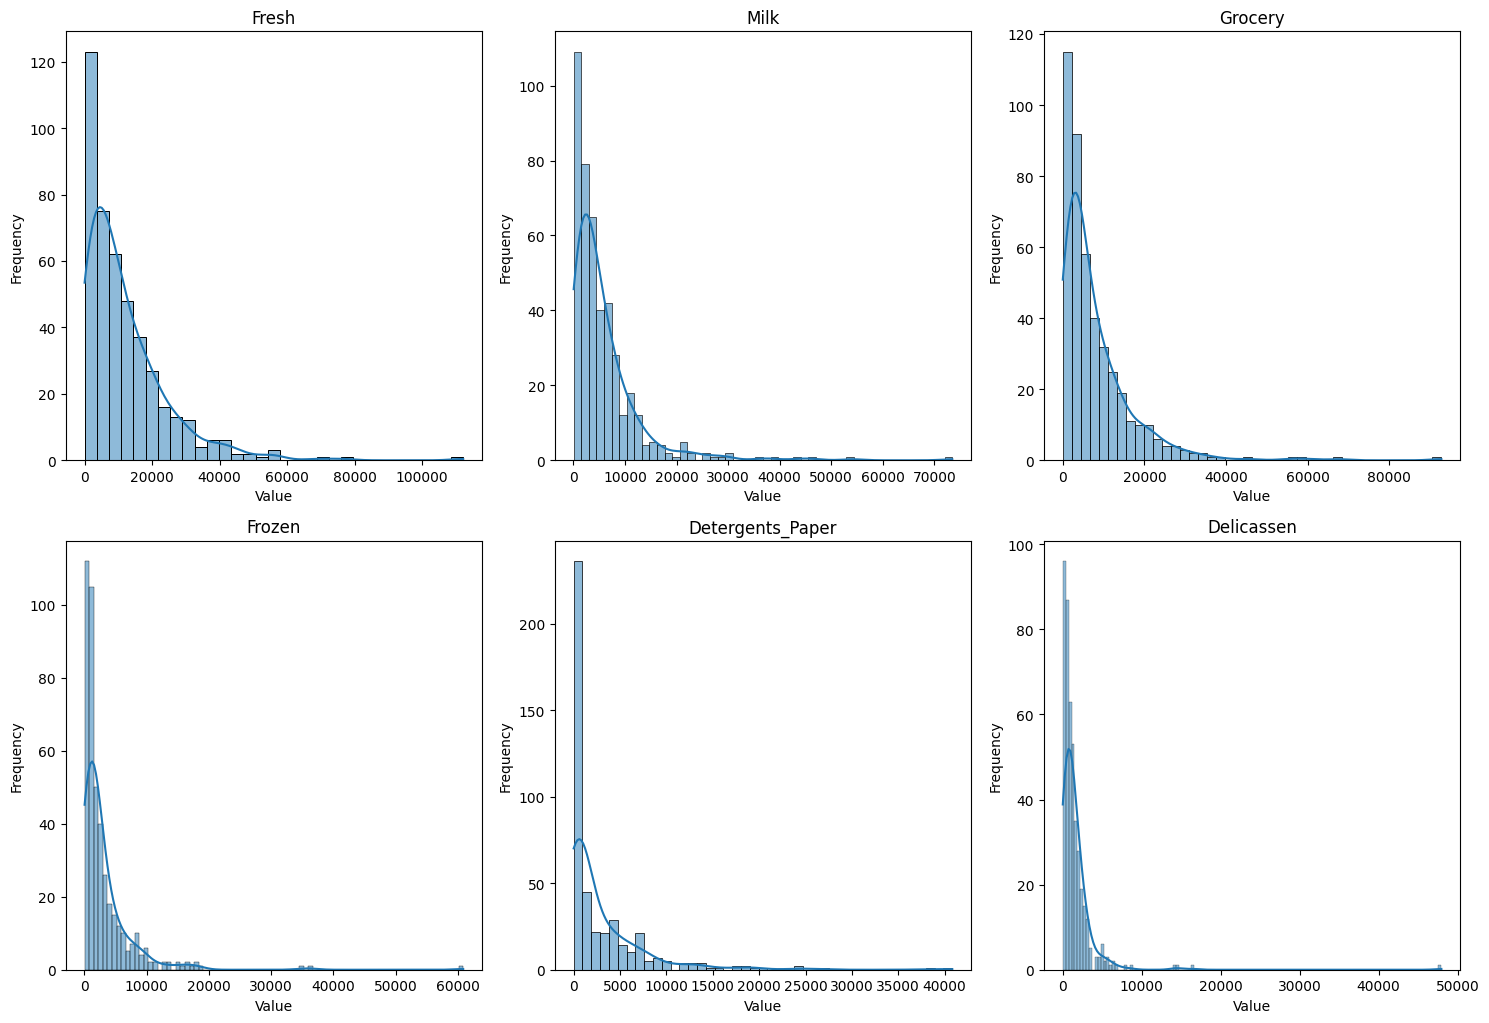

In [50]:
# Calculate the number of rows and columns for the subplot grid
num_columns = len(columns)
grid_size = math.ceil(math.sqrt(num_columns))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(X[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, grid_size * grid_size):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Yes every single column's distribution is very positively skewed

In [ ]:
# Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that 
# roughly 20% of the customers account for 80% of the typical retail sales. 
# This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). 
# Check if this dataset displays this characteristic.

In [54]:
retail = X[X['Channel'] == 2]
retail.iloc[:,1:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
...,...,...,...,...,...,...
418,660,8494,18622,133,6740,776
421,17063,4847,9053,1031,3415,1784
423,17565,3686,4657,1059,1803,668
424,16980,2884,12232,874,3213,249


In [62]:
#Taking only the retail
retail = X[X['Channel'] == 2]

#Creating a new column called 'Sum'
retail['Sum'] = retail.iloc[:,1:].sum(axis=1)

#Sorting by the Sum and suming
X_sorted = retail.sort_values(by='Sum', ascending=False)
total_sum = X_sorted['Sum'].sum()

#Suming the top 20%
richest_sum = X_sorted['Sum'].iloc[:29].sum()

#Checking if the Sum of the 20% is more than 80% of the total amount
percentage = (richest_sum / total_sum) * 100

The top 20% of buyers account for :  38.98582930849279 % of retail sales volume
This dataset does NOT follow the Pareto principle


C:\Users\drago\AppData\Local\Temp\ipykernel_38052\3331571950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Sum'] = retail.iloc[:,1:].sum(axis=1)


In [63]:
#Printing the result
print("The top 20% of buyers account for : ", percentage,"% of retail sales volume")
print("This dataset does NOT follow the Pareto principle")

The top 20% of buyers account for :  38.98582930849279 % of retail sales volume
This dataset does NOT follow the Pareto principle


**Your observations here**

- 



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [15]:
# Yes we need transformation of the data and removal of outliers
# since the insights we are looking for need to apply to the majority of buyers for the store to increase profitability

In [68]:
# Calculate Z-scores
z_scores = np.abs((X - X.mean()) / X.std())

# Define a threshold to identify outliers
threshold = 3
outliers_z_scores = (z_scores > threshold).any(axis=1)

# Get outliers
outliers_data_z_scores = X[outliers_z_scores]
print("Outliers using Z-score method:\n", outliers_data_z_scores)

Outliers using Z-score method:
      Channel   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
23         2   26373  36423    22019    5154              4337       16523
39         1   56159    555      902   10002               212        2916
47         2   44466  54259    55571    7782             24171        6465
56         2    4098  29892    26866    2616             17740        1340
61         2   35942  38369    59598    3254             26701        2017
65         2      85  20959    45828      36             24231        1423
71         1   18291   1266    21042    5373              4173       14472
85         2   16117  46197    92780    1026             40827        2944
86         2   22925  73498    32114     987             20070         903
87         1   43265   5025     8117    6312              1579       14351
92         2    9198  27472    32034    3232             18906        5130
93         1   11314   3090     2062   35009                71      

In [69]:
X_cleaned = X[~X.index.isin(outliers_data_z_scores.index)]
X_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           414 non-null    int64
 1   Fresh             414 non-null    int64
 2   Milk              414 non-null    int64
 3   Grocery           414 non-null    int64
 4   Frozen            414 non-null    int64
 5   Detergents_Paper  414 non-null    int64
 6   Delicassen        414 non-null    int64
dtypes: int64(7)
memory usage: 25.9 KB


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [72]:
from sklearn.preprocessing import StandardScaler

customers_scale = StandardScaler().fit_transform(X_cleaned)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [104]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

In [105]:
kmeans.fit(customers_scale)

KMeans(n_clusters=2)

In [106]:
labels = list(kmeans.labels_)

In [107]:
X_cleaned['labels'] = labels

C:\Users\drago\AppData\Local\Temp\ipykernel_38052\895066878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['labels'] = labels


In [108]:
X_cleaned


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,12669,9656,7561,214,2674,1338,0
1,2,7057,9810,9568,1762,3293,1776,0
2,2,6353,8808,7684,2405,3516,7844,0
3,1,13265,1196,4221,6404,507,1788,1
4,2,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,1
436,1,39228,1431,764,4510,93,2346,1
437,2,14531,15488,30243,437,14841,1867,0
438,1,10290,1981,2232,1038,168,2125,1


### Looking to the elbow we can choose 2 like the correct number of clusters

In [22]:
# I have no idea what this statement means

Count the values in `labels`.

In [111]:
X_cleaned['labels'].value_counts()

labels
1    287
0    127
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [117]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)
clusters = list(dbscan.fit_predict(customers_scale))

In [119]:
X_cleaned['labels_DBSCAN'] = clusters

C:\Users\drago\AppData\Local\Temp\ipykernel_38052\921704632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned['labels_DBSCAN'] = clusters


Count the values in `labels_DBSCAN`.

In [120]:
X_cleaned['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    295
 0    104
 1     15
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

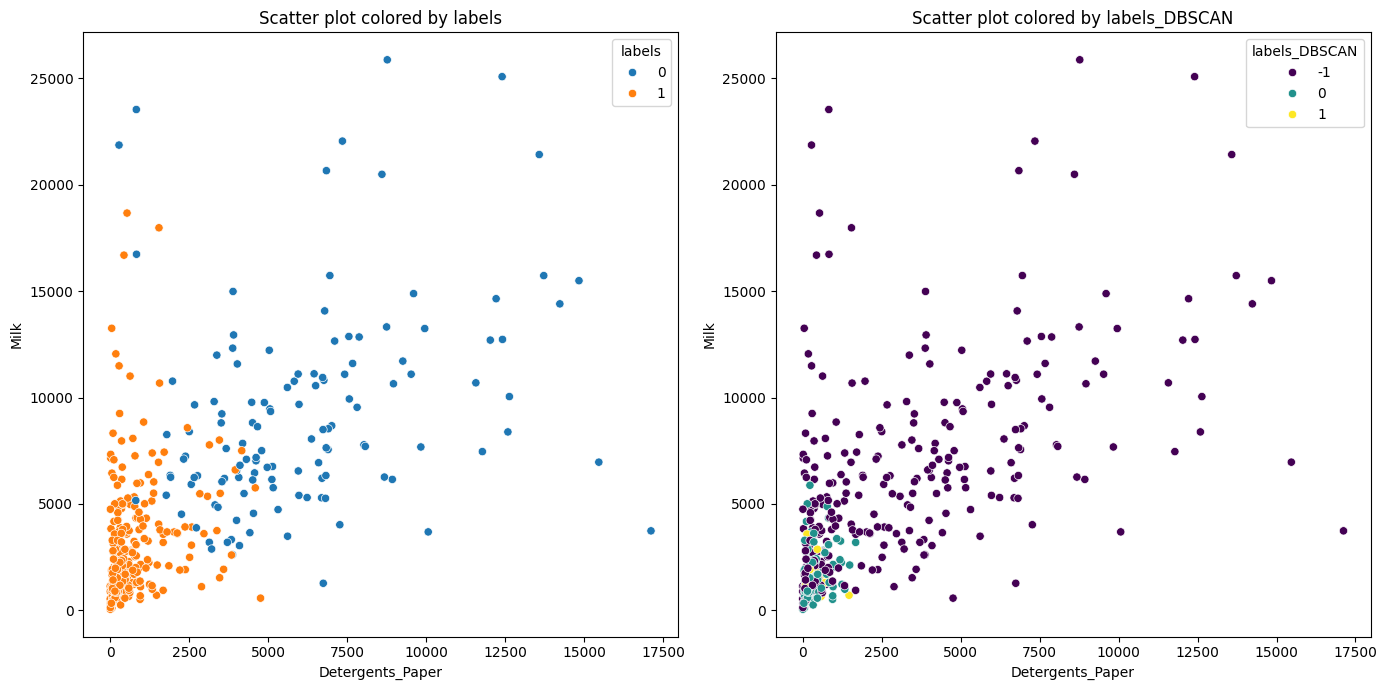

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(ax=axes[0], data=X_cleaned, x='Detergents_Paper', y='Milk', hue='labels')
axes[0].set_title('Scatter plot colored by labels')
axes[0].set_xlabel('Detergents_Paper')
axes[0].set_ylabel('Milk')

# Second scatter plot colored by `labels_DBSCAN`
sns.scatterplot(ax=axes[1], data=X_cleaned, x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', palette='viridis')
axes[1].set_title('Scatter plot colored by labels_DBSCAN')
axes[1].set_xlabel('Detergents_Paper')
axes[1].set_ylabel('Milk')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

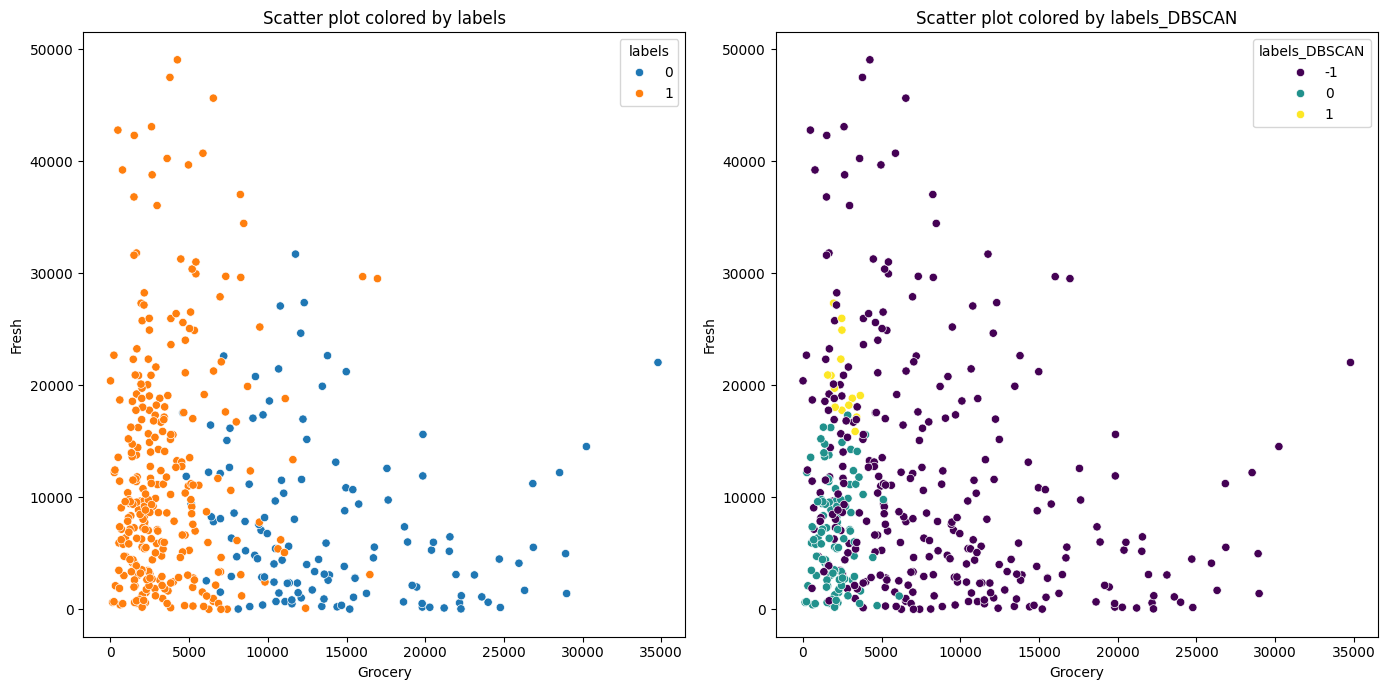

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(ax=axes[0], data=X_cleaned, x='Grocery', y='Fresh', hue='labels')
axes[0].set_title('Scatter plot colored by labels')
axes[0].set_xlabel('Grocery')
axes[0].set_ylabel('Fresh')

# Second scatter plot colored by `labels_DBSCAN`
sns.scatterplot(ax=axes[1], data=X_cleaned, x='Grocery', y='Fresh', hue='labels_DBSCAN', palette='viridis')
axes[1].set_title('Scatter plot colored by labels_DBSCAN')
axes[1].set_xlabel('Grocery')
axes[1].set_ylabel('Fresh')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

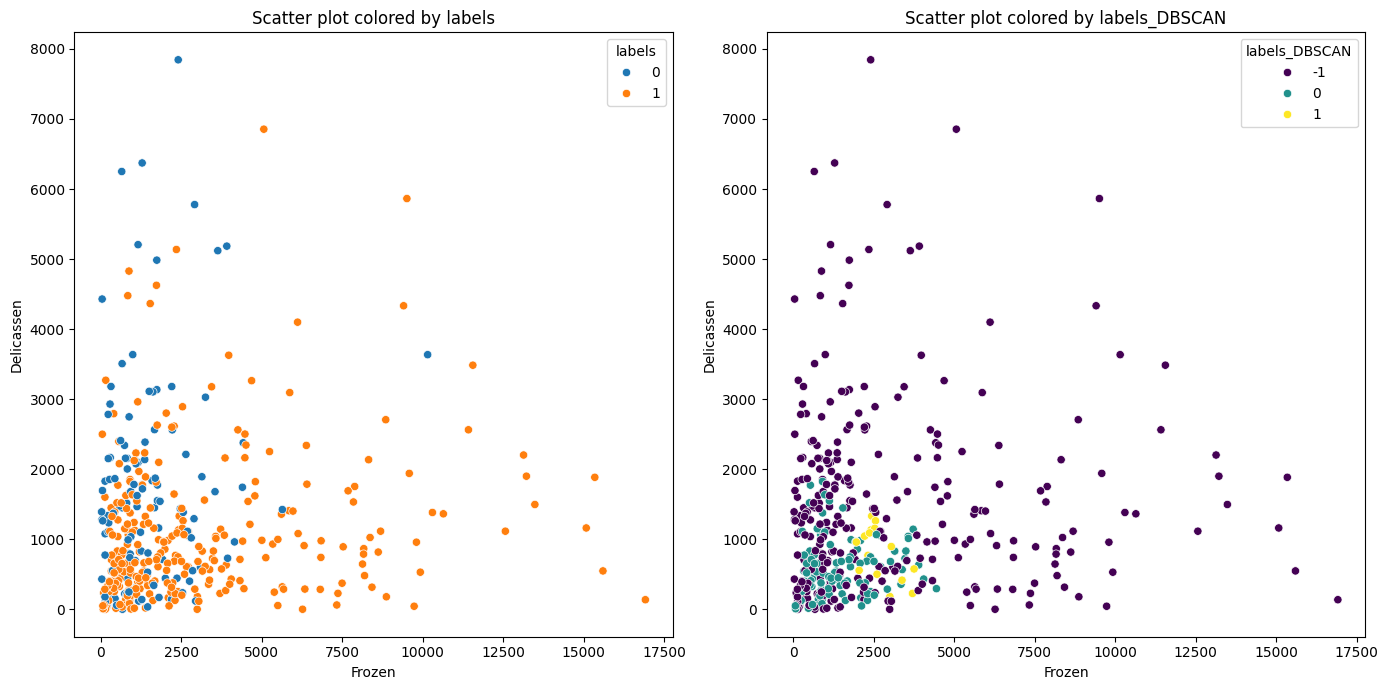

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(ax=axes[0], data=X_cleaned, x='Frozen', y='Delicassen', hue='labels')
axes[0].set_title('Scatter plot colored by labels')
axes[0].set_xlabel('Frozen')
axes[0].set_ylabel('Delicassen')

# Second scatter plot colored by `labels_DBSCAN`
sns.scatterplot(ax=axes[1], data=X_cleaned, x='Frozen', y='Delicassen', hue='labels_DBSCAN', palette='viridis')
axes[1].set_title('Scatter plot colored by labels_DBSCAN')
axes[1].set_xlabel('Frozen')
axes[1].set_ylabel('Delicassen')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [147]:
X_cleaned.groupby('labels').mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,
0,1.952756,7435.110236,9225.110236,14244.787402,1410.622047,6150.456693,1609.346457,-1.000000
1,1.031359,12161.703833,2945.595819,3525.874564,3054.038328,702.010453,1073.588850,-0.533101


In [148]:
X_cleaned.groupby('labels_DBSCAN').mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,
-1,1.440678,11677.986441,6173.549153,8713.315254,2934.030508,3175.528814,1483.806780,0.569492
0,1.000000,6581.721154,1656.019231,2048.009615,1440.269231,378.336538,602.413462,1.000000
1,1.000000,20344.200000,1570.133333,2506.200000,2688.733333,430.466667,808.866667,1.000000


Which algorithm appears to perform better?

**Your observations here**

- Visually, the KMeans algo appears to perform the best, the plotted clusters look better defined than for the DBscan.
- The fact that KMeans did not classify outliers allows us to easily create two classes and get business insights.
- In my opinion KMeans performed the best overall.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [32]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [33]:
# Your code here

**Your comment here**

- 